# A_Z Handwritten Alphabet with PyTorch
hy-kiera
refer : PyTorch를 활용한, 머신러닝, 딥러닝 철저 입문 - 코이즈미 시토시

In [1]:
# import PyTorch(1.0.0) Library
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# import scikit-learn Library
from sklearn.datasets import load_digits
from sklearn import datasets, model_selection
from sklearn.utils import shuffle

# import pandas(0.23.4) Library
import pandas as pd

# import numpy(1.15.1) Library
import numpy as np

#import matplotlib(2.2.3) Library
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
dataset = pd.read_csv('./datas/A_Z_Handwritten_Data.csv')

In [4]:
dataset.shape

(372450, 785)

In [5]:
dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset.rename(columns={'0':'label'}, inplace=True)

train_data = dataset.drop('label', axis = 1)
data_label = dataset['label']

In [7]:
pd.DataFrame(train_data)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


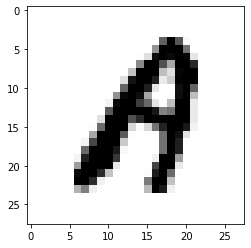

In [8]:
plt.imshow(train_data.iloc[0].values.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

In [9]:
train_shuffle = shuffle(train_data)

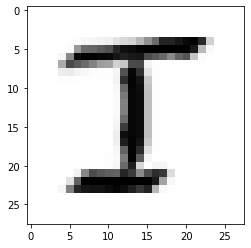

In [10]:
plt.imshow(train_shuffle.iloc[0].values.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

In [11]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(train_shuffle, data_label)

In [12]:
print(train_X.shape, test_X.shape)

(279337, 784) (93113, 784)


In [13]:
print(test_X.shape, test_Y.shape)

(93113, 784) (93113,)


In [14]:
print(type(train_X), type(train_X.values))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [15]:
# 길이가 784인 1차원 배열을 28*28 크기의 2차원 배열로 만듦
train_X = train_X.values.reshape((len(train_X), 1, 28, 28))
test_X = test_X.values.reshape((len(test_X), 1, 28, 28))

In [16]:
# convert to Tensor
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y.values).long()

test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y.values).long()

print(train_X.shape)
print(train_Y.shape)
print(type(train_X))

torch.Size([279337, 1, 28, 28])
torch.Size([279337])
<class 'torch.Tensor'>


In [17]:
train = TensorDataset(train_X, train_Y)

print(train[0])

# mini-batch
train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
    

In [18]:
# (Convolution) Neural Net
# input layer : 1 (784 nodes)
# output layer : 1 (26 nodes)
# convolution layer : 2
# pooling layer : 2
# fully-connected layer : 1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution layer - stride = 1
        self.conv1 = nn.Conv2d(1, 6, 5) # input(gray), output, filter
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # fully-connected
        # 256 = (((28-5+1)/2)-5+1)/2 * (((28-5+1)/2)-5+1)/2 * 16
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 26)
        
    def forward(self, x):
        # pooling layer - max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.log_softmax(x)
    
# instance
model = Net()

In [19]:
# loss function object
criterion = nn.CrossEntropyLoss()

# optimizer - SGD, learning rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

# learning
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        # computation graph
        train_x, train_y = Variable(train_x), Variable(train_y)
        # initialize gradient
        optimizer.zero_grad()
        # forward
        output = model(train_x)
        # loss
        loss = criterion(output, train_y)
        # backward
        loss.backward()
        # update weight
        optimizer.step()
        # cumulative loss
        total_loss += loss.data
    # print the cumulative loss at every 100
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)
    if (epoch+1) == 1000: 
        print("Accuracy : ", 1 - total_loss)

/home/jaram/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


100 tensor(8056.3643)
200 tensor(7995.5996)
300 tensor(7970.2104)
400 tensor(7958.1973)
500 tensor(7949.5190)
600 tensor(7944.2524)
700 tensor(7938.9761)
800 tensor(7935.6113)
900 tensor(7933.4438)
1000 tensor(7931.4912)
Accuracy :  tensor(-7930.4912)
